In [1]:
from sklearn.datasets import load_iris # iris dataset
from sklearn import tree # for fitting model

# for the particular visualization used
from six import StringIO
import pydot
import os.path

# to display graphs 
%matplotlib inline
import matplotlib.pyplot

In [2]:
# get dataset 
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
import pandas
iris_df = pandas.DataFrame(iris.data)
iris_df.columns = iris.feature_names
iris_df['target'] = [iris.target_names[target] for target in iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       se

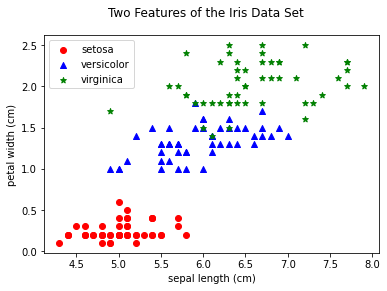

In [6]:
# choose two features to plot
x_feature = 0
y_feature = 3

#x = list(list(zip(*iris.data))[x_feature])
#y = list(list(zip(*iris.data))[y_feature])
x = iris.data[:, x_feature]
y = iris.data[:, y_feature]

# The data are in order by type (types of irises). Find out the border indexes of the types. 
end_type_one = list(iris.target).index(1)
end_type_two = list(iris.target).index(2)

fig = matplotlib.pyplot.figure() # create graph
fig.suptitle('Two Features of the Iris Data Set') # set title 
# set axis labels 
matplotlib.pyplot.xlabel(iris.feature_names[x_feature])
matplotlib.pyplot.ylabel(iris.feature_names[y_feature])

# put the input data on the graph, with different colors and shapes for each type
scatter_0 = matplotlib.pyplot.scatter(x[:end_type_one], y[:end_type_one],
                                      c="red", marker="o", label=iris.target_names[0])
scatter_1 = matplotlib.pyplot.scatter(x[end_type_one:end_type_two], y[end_type_one:end_type_two],
                                      c="blue", marker="^", label=iris.target_names[1])
scatter_2 = matplotlib.pyplot.scatter(x[end_type_two:], y[end_type_two:],
                                      c="green", marker="*", label=iris.target_names[2])

matplotlib.pyplot.legend(handles=[scatter_0, scatter_1, scatter_2]) # make legend

matplotlib.pyplot.show() # show the graph 

In [7]:
print(iris.data)
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
decision_tree = tree.DecisionTreeClassifier() # make model 
decision_tree.fit(iris.data, iris.target) # fit model to data 

DecisionTreeClassifier()

In [9]:
# make pdf diagram of decision tree
dot_data = StringIO()
tree.export_graphviz(decision_tree, out_file=dot_data, feature_names=iris.feature_names, class_names=iris.target_names,
                     filled=True, rounded=True, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_pdf(os.path.expanduser("~/Desktop/introToML/ML/New Jupyter Notebooks/iris_decision_tree_regular.pdf"))

In [10]:
inputs = [iris.data[0], iris.data[end_type_one], iris.data[end_type_two]] # use the first input of each class 
print('Class predictions: {0}'.format(list(iris.target_names[prediction] for prediction in decision_tree.predict(inputs)))) # print predictions
print('Probabilities:\n{0}'.format(decision_tree.predict_proba(inputs))) # print prediction probabilities 


Class predictions: ['setosa', 'versicolor', 'virginica']
Probabilities:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Exercise Option #1 - Standard Difficulty

0. Submit the PDF you generated as a separate file in Canvas.
1. According to the PDF, a petal width <= 0.8 cm would tell you with high (100%) probability that you are looking at a setosa iris. 
2. According to the PDF, you're supposed to look at the petal length, petal width, and sepal length to tell a virginica from a versicolor.
3. The array value at each node in the pdf shows how many data values of each class passed through the node. 
4. The predictions are always have a 100% probability because any data value you give will end up at one end node. Each end node has one class prediction. 
5. Below I use a subset of the features (3/4). The new decision tree was completely different than the original: it had more nodes and a different overall shape. When looking at the original decision tree, most of the nodes separated data based on petal length or petal width. The one feature that the new tree does not use is petal width, which is the most likely cause for why the second tree had to use more nodes (it lacked a feature that would make it easy to distinguish the classes). 

In [11]:
# Use 3/4 columns (the first, second, & third)
first_feature = 0
second_feature = 1
third_feature = 2
iris_inputs = iris.data[:,[first_feature, second_feature, third_feature]] # use only two collumns of the data 

decision_tree_with_portion = tree.DecisionTreeClassifier() # make model 
decision_tree_with_portion.fit(iris_inputs, iris.target) # fit model to data 

# make pdf diagram of decision tree
dot_data = StringIO()
tree.export_graphviz(decision_tree_with_portion, out_file=dot_data, feature_names=iris.feature_names[:3], class_names=iris.target_names,
                     filled=True, rounded=True, special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_pdf(os.path.expanduser("~/Desktop/introToML/ML/New Jupyter Notebooks/iris_decision_tree_with_portion.pdf"))

new_inputs = [iris_inputs[0], iris_inputs[end_type_one], iris_inputs[end_type_two]] # make new inputs with iris_inputs, which only has two features per input
print('Class predictions: {0}'.format(list(iris.target_names[prediction] for prediction in decision_tree_with_portion.predict(new_inputs)))) # print predictions
print('Probabilities:\n{0}'.format(decision_tree_with_portion.predict_proba(new_inputs))) # print prediction probabilities 

Class predictions: ['setosa', 'versicolor', 'virginica']
Probabilities:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Exercise Option #2 - Advanced Difficulty
Try fitting a Random Forest model to the iris data. See [this example](http://scikit-learn.org/stable/modules/ensemble.html#forest).

As seen below, the random forest & decision tree had the same F1 score (a perfect 1.0), meaning that they performed the same. 

In [12]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 
rand_forst = RandomForestClassifier() # make model 
rand_forst = rand_forst.fit(iris.data, iris.target) # fit model 
print('Class predictions: {0}'.format(list(iris.target_names[prediction] for prediction in rand_forst.predict(inputs)))) # print class predictions


Class predictions: ['setosa', 'versicolor', 'virginica']


In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html?highlight=f1#sklearn.metrics.f1_score
from sklearn.metrics import f1_score

# get predictions for whole dataset
decision_tree_predictions = decision_tree.predict(iris.data) 
rand_forst_predictions = rand_forst.predict(iris.data)

# print F1 scores
print ('Decision tree F1 score: {}'.format(f1_score(iris.target, decision_tree_predictions, average='weighted')))
print ('Random forest F1 score: {}'.format(f1_score(iris.target, rand_forst_predictions, average='weighted')))

Decision tree F1 score: 1.0
Random forest F1 score: 1.0
